In [1]:
import pandas as pd
import pymc3 as pm, theano.tensor as tt
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import numpy as np

import bayesian_utils as bu

In [2]:
df = bu.data_cleaner('english_season-1819_csv.csv')

df.head()

,home_team,away_team,home_score,away_score
0,Man United,Leicester,2,1
1,Bournemouth,Cardiff,2,0
2,Fulham,Crystal Palace,0,2
3,Huddersfield,Chelsea,0,3
4,Newcastle,Tottenham,1,2


In [3]:
teams = df.home_team.unique()
teams = pd.DataFrame(teams, columns=['team'])
teams['i'] = teams.index

df = pd.merge(df, teams, left_on='home_team', right_on='team', how='left')
df = df.rename(columns = {'i': 'i_home'}).drop('team', 1)
df = pd.merge(df, teams, left_on='away_team', right_on='team', how='left')
df = df.rename(columns = {'i': 'i_away'}).drop('team', 1)

observed_home_goals = df.home_score.values
observed_away_goals = df.away_score.values

home_team = df.i_home.values
away_team = df.i_away.values

num_teams = len(df.i_home.drop_duplicates())
num_games = len(home_team)

g = df.groupby('i_away')
att_starting_points = np.log(g.away_score.mean())
g = df.groupby('i_home')
def_starting_points = -np.log(g.away_score.mean())

In [4]:
model = bu.set_model(num_teams, home_team, away_team, observed_home_goals, observed_away_goals)
model

In [10]:
trace = bu.train_model(model, num_samples = 10000, discard = 2000, cores = 4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [defs_star, atts_star, intercept, sd_def, sd_att, home]
Sampling 4 chains: 100%|██████████| 48000/48000 [00:40<00:00, 1171.14draws/s]


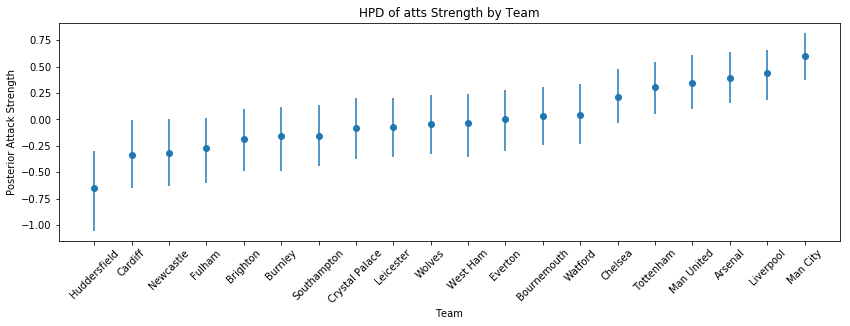

In [6]:
bu.team_parameter_explorer(trace, teams, param = 'atts');

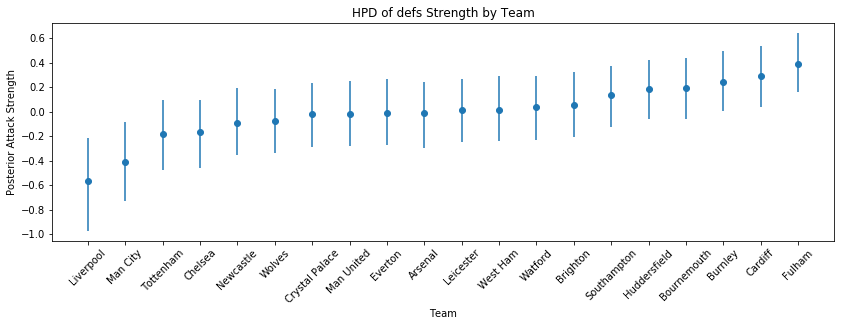

In [7]:
bu.team_parameter_explorer(trace, teams, param = 'defs');

In [29]:
bu.match_score(trace, df, 'Liverpool', 'Man City', sample_size = int(1e6))

{'winner': 'Liverpool',
 'probs': {'home_team': 0.36328, 'away_team': 0.36073, 'draw': 0.27599},
 'home_team_goals': {'95%': 0.0,
  '75%': 0.0,
  '50%': 1.0,
  '25%': 2.0,
  '10%': 3.0,
  '05%': 3.0},
 'away_team_goals': {'95%': 0.0,
  '75%': 0.0,
  '50%': 1.0,
  '25%': 2.0,
  '10%': 3.0,
  '05%': 3.0}}